# Day 14

In [1]:
from aocd import get_data
from inspect import cleandoc
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=14)

## Part 1

In [2]:
example = cleandoc("""
    O....#....
    O.OO#....#
    .....##...
    OO.#O....O
    .O.....O#.
    O.#..O.#.#
    ..O..#O..O
    .......O..
    #....###..
    #OO..#....
""")

expected = cleandoc("""
    OOOO.#.O..
    OO..#....#
    OO..O##..O
    O..#.OO...
    ........#.
    ..#....#.#
    ..O..#.O.O
    ..O.......
    #....###..
    #....#....
""")

In [3]:
from dataclasses import dataclass
from enum import Enum
from more_itertools import transpose


class Direction(Enum):
    NORTH = "N"
    WEST = "W"
    SOUTH = "S"
    EAST = "E"


@dataclass
class Platform:
    rocks: list[str]

    @classmethod
    def parse(cls, text):
        return cls(text.split("\n"))

    def spin(self):
        for direction in Direction:
            self.tilt(direction)

    def spin_many(self, times):
        cache = []
        for i in range(times):
            self.spin()
            if self.rocks in cache:
                s = cache.index(self.rocks)
                period = len(cache) - s
                self.rocks = cache[(times - s - 1) % period + s]
                return
            cache.append(self.rocks)

    def tilt(self, direction):
        match direction:
            case Direction.NORTH:
                self.transpose()
                self.tilt_left()
                self.transpose()
            case Direction.WEST:
                self.tilt_left()
            case Direction.SOUTH:
                self.transpose()
                self.tilt_right()
                self.transpose()
            case Direction.EAST:
                self.tilt_right()

    def transpose(self):
        self.rocks = [
            "".join(line)
            for line in transpose(self.rocks)
        ]

    def tilt_left(self):
        self.rocks = [
            "#".join(
                "".join(sorted(part, reverse=True))
                for part in line.split("#")
            )
            for line in self.rocks
        ]

    def tilt_right(self):
        self.rocks = [
            "#".join(
                "".join(sorted(part))
                for part in line.split("#")
            )
            for line in self.rocks
        ]

    def total_north_beam_load(self):
        return sum(
            (len(self.rocks) - i) * (c == "O")
            for i, line in enumerate(self.rocks)
            for c in line
        )

    def image(self):
        PIXELS = {"O": (20, 20, 200), "#": (100, 100, 100), ".": (200, 200, 200)}
        return [
            [PIXELS[c] for c in line]
            for line in self.rocks
        ]

    def __str__(self):
        return "\n".join(self.rocks)

In [4]:
example_platform = Platform.parse(example)
example_platform.tilt(Direction.NORTH)
example_platform.total_north_beam_load()

136

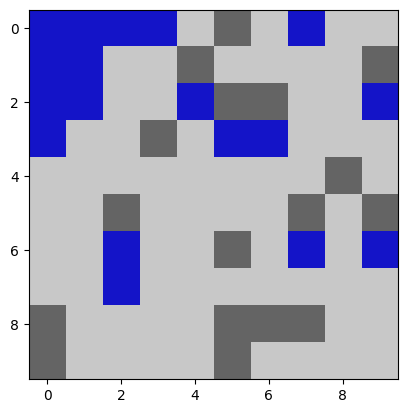

In [5]:
from matplotlib.pyplot import figure

fig = figure()
ax = fig.add_subplot()
ax.imshow(example_platform.image())

In [6]:
data_platform = Platform.parse(data)
data_platform.tilt(Direction.NORTH)
answer(data_platform.total_north_beam_load())

**Answer** = 106990

## Part 2

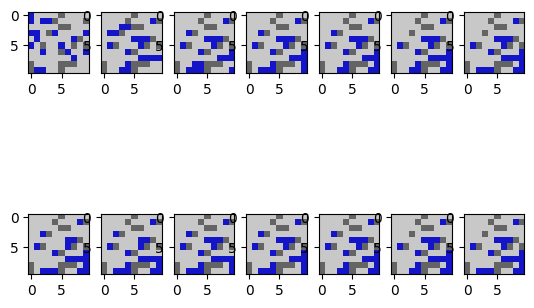

In [7]:
example_platform = Platform.parse(example)
images = [example_platform.image()]
for i in range(13):
    example_platform.spin()
    images.append(example_platform.image())

fig = figure()
for i, image in enumerate(images, start=1):
    ax = fig.add_subplot(2, 7, i)
    ax.imshow(image)

In [8]:
example_platform = Platform.parse(example)

example_platform.spin_many(1_000_000_000)
example_platform.total_north_beam_load()

64

In [9]:
data_platform = Platform.parse(data)
data_platform.spin_many(1_000_000_000)
answer(data_platform.total_north_beam_load())

**Answer** = 100531